# Module 7 Project -Task 2

Author: [Hayley Massey](https://github.com/HMas522)
Repository: [datafun-datafun-07-ml-predictive](https://github.com/HMas522/datafun-07-ml-predictive)

# Section 1 - Chapter 15 Examples for Practice

# Section 1.1 

In [2]:
#import
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Display the target values of every 100th sample
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [4]:
# Confirm number of samples: shape attribute
digits.data.shape

(1797, 64)

In [5]:
# Flatten a two-dimensional array into a one-dimensional array: Sample image at index 13
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [6]:
#Display the 8x8 image data
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [7]:
digits.target[22]

2

# Section 1.2 - Visualizing the Data

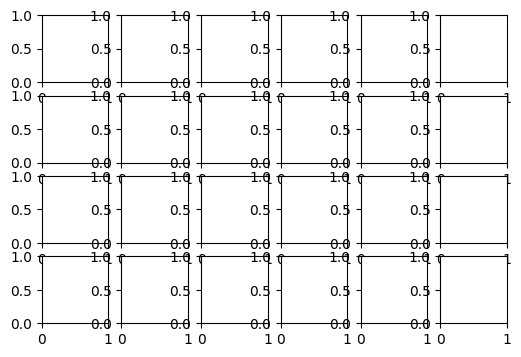

In [8]:
#import and display
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [10]:
#Prepare the image
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

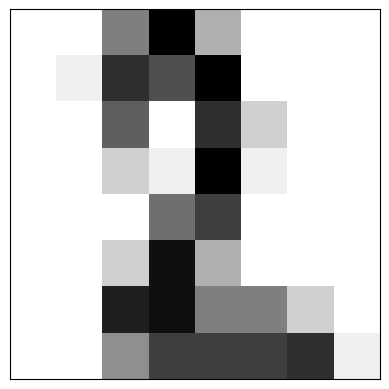

In [12]:
#Display the image
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

# Section 2 Practice splitting data for training & testing

# Section 2.1 -Train & Test

In [13]:
#import
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)

In [14]:
#75% for Train
x_train.shape

(1347, 64)

In [15]:
#25% for Test
x_test.shape

(450, 64)

In [27]:
# Different split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.40
)

In [28]:
y_train.shape

(1078,)

In [29]:
y_test.shape

(719,)

# Section 2.2 - KNeighborsClassifier()

In [30]:
#import
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [34]:
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

# Section 2.3 - Predicting Digit Classes

In [35]:
#Set-up
predicted = knn.predict(x_test)
expected = y_test

In [36]:
#predicted
predicted[:20]

array([0, 2, 4, 8, 7, 1, 9, 6, 3, 4, 4, 2, 9, 0, 7, 8, 0, 4, 1, 7])

In [37]:
#expected
expected[:20]

array([0, 2, 4, 8, 7, 1, 9, 6, 3, 5, 4, 2, 9, 0, 7, 8, 0, 4, 1, 7])

In [38]:
#predicted and expected vlaues do not match
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(4, 5),
 (3, 8),
 (2, 8),
 (1, 8),
 (1, 8),
 (5, 9),
 (7, 9),
 (6, 5),
 (9, 7),
 (1, 8),
 (9, 5),
 (1, 8),
 (1, 8),
 (1, 8),
 (2, 3),
 (7, 4)]

# Section 2.4 - Metrics Model for Accuracy

In [39]:
#Estimator using score method
print(f'{knn.score(x_test, y_test):.2%}')

97.77%


In [40]:
#confusion matrix
#import & display
#principal diagonal indicate incorrect predictions
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 70,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 67,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 66,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 73,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  1],
       [ 0,  6,  1,  1,  0,  0,  0,  0, 71,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 75]], dtype=int64)

In [41]:
#Call classification report
#Displays classification metrics based on expected and predicted values
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.90      1.00      0.95        55
           2       0.97      1.00      0.99        70
           3       0.99      0.99      0.99        68
           4       0.99      0.99      0.99        75
           5       0.99      0.96      0.97        69
           6       0.99      1.00      0.99        73
           7       0.97      0.99      0.98        71
           8       1.00      0.90      0.95        79
           9       0.97      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



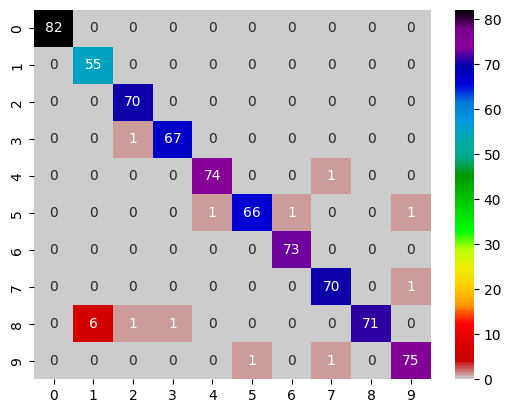

In [42]:
#Visualize
#Draws attention to incorrect predictions
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

# Section 2.5 - K Fold Cross-Validation

In [43]:
#import
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [44]:
#import and display
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [45]:
#display mean Accuracy
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [46]:
#display accuracy std
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


# Section 2.6 - Multiple Models

In [47]:
#import
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [48]:
#set-up
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()
}

In [50]:
#set-up and execute
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=digits.data, y=digits.target, cv=kfold)
    print(f'mean accuracy={scores.mean():.2%};' +
          f'standard deviation={scores.std():.2f}')

mean accuracy=98.72%;standard deviation=0.01
mean accuracy=98.72%;standard deviation=0.01
mean accuracy=84.48%;standard deviation=0.03


# Section 2.7 - Hyperparameter Tuning

In [52]:
#hyperparameter tuning using odds to avoid ties
for k in range (1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
                             X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}: mean accuracy={scores.mean():.2%}; ' + 
          f'standard deviation={scores.std():.2%}')

k=1 : mean accuracy=98.83%; standard deviation=0.58%
k=3 : mean accuracy=98.83%; standard deviation=0.72%
k=5 : mean accuracy=98.72%; standard deviation=0.75%
k=7 : mean accuracy=98.44%; standard deviation=0.96%
k=9 : mean accuracy=98.39%; standard deviation=0.80%
k=11: mean accuracy=98.33%; standard deviation=0.90%
k=13: mean accuracy=97.89%; standard deviation=0.89%
k=15: mean accuracy=97.89%; standard deviation=1.02%
k=17: mean accuracy=97.50%; standard deviation=1.00%
k=19: mean accuracy=97.66%; standard deviation=0.96%


# 2.8 Task 3 - Simple Linear Regression

In [53]:
#import and load data frame
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)

In [54]:
#View data frame to verify correct load
nyc.head(5)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [55]:
#Split for Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11
)

In [56]:
#Call
X_train.shape

(93, 1)

In [57]:
#Call
X_test.shape

(31, 1)

In [58]:
#Train the model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [59]:
#Call slope
linear_regression.coef_

array([0.01939167])

In [60]:
#Call y-int
linear_regression.intercept_

-0.30779820252656975

In [61]:
#Test the model that was created
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [62]:
#Make Prediction using model
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2026)

array([38.97973189])

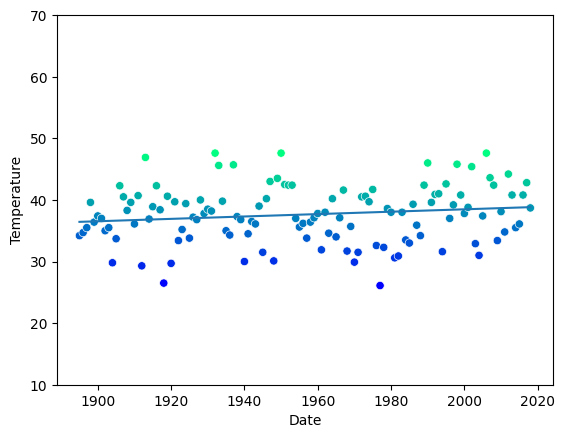

In [63]:
#Visualize the data
#import Seaborn
#Create plot
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', 
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

import matplotlib.pyplot as plt
line = plt.plot(x, y)

# Final Author's comments

It is hard to tell which model is better, since temperature not a one dimensional value. At surface level, the values that were predicted were very similar to one another: 38.62 and 38.98. Lots of factors influence temperature, as seen by the high and low values on the scatter plots. Say you are a school and want to predict if school closures are likely (School closure occurs at below 32 degrees), this would be a good model. 